In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("Bike Prices.csv")
data.head(10)

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0
5,Bajaj,Bajaj Discover 100,20000,2012,Individual,1st owner,85000,42859.0
6,Bajaj,Bajaj Discover 100,30000,2011,Individual,1st owner,45000,42859.0
7,Bajaj,Bajaj Discover 100,25000,2010,Individual,2nd owner,28000,42859.0
8,Bajaj,Bajaj Discover 100,28000,2015,Individual,2nd owner,52000,42859.0
9,Bajaj,Bajaj Discover 100,22000,2014,Individual,1st owner,14289,42859.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   int64  
 3   Year               1061 non-null   int64  
 4   Seller_Type        1061 non-null   object 
 5   Owner              1061 non-null   object 
 6   KM_Driven          1061 non-null   int64  
 7   Ex_Showroom_Price  626 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 66.4+ KB


In [5]:
data=data.dropna()

In [6]:
data.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,626.000000,626.000000,626.000000,6.260000e+02
mean,59445.164537,2014.800319,32671.576677,8.795871e+04
std,59904.350888,3.018885,45479.661039,7.749659e+04
min,6000.000000,2001.000000,380.000000,3.049000e+04
25%,30000.000000,2013.000000,13031.250000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,65000.000000,2017.000000,40000.000000,8.703150e+04
max,760000.000000,2020.000000,585659.000000,1.278000e+06


In [7]:
data[['Brand']].value_counts()

Brand   
Honda       170
Bajaj       143
Hero        108
Yamaha       94
Royal        40
TVS          23
Suzuki       18
KTM           6
Mahindra      6
Kawasaki      4
UM            3
Activa        3
Harley        2
Vespa         2
BMW           1
Hyosung       1
Benelli       1
Yo            1
dtype: int64

In [8]:
data[['Model']].value_counts()

Model                                     
Honda Activa [2000-2015]                      23
Honda CB Hornet 160R                          22
Bajaj Pulsar 180                              20
Yamaha FZ S V 2.0                             16
Bajaj Discover 125                            16
                                              ..
Royal Enfield Thunderbird 500                  1
Royal Enfield Continental GT [2013 - 2018]     1
Royal Enfield Classic Stealth Black            1
Royal Enfield Classic Squadron Blue            1
Yo Style                                       1
Length: 183, dtype: int64

In [9]:
data[['Seller_Type']].value_counts()

Seller_Type
Individual     623
Dealer           3
dtype: int64

In [10]:
data[['Owner']].value_counts()

Owner    
1st owner    556
2nd owner     66
3rd owner      3
4th owner      1
dtype: int64

In [11]:
data.columns

Index(['Brand', 'Model', 'Selling_Price', 'Year', 'Seller_Type', 'Owner',
       'KM_Driven', 'Ex_Showroom_Price'],
      dtype='object')

In [12]:
data.shape

(626, 8)

In [13]:
data.replace({"Seller_Type":{"Individual":0,'Dealer':1}},inplace=True)

In [15]:
data.replace({'Owner':{'1st owner':0,'2nd owner':1,'3rd owner':2,'4th owner':3}},inplace=True)

In [16]:
y=data['Selling_Price']

In [17]:
y.shape

(626,)

In [18]:
y

0       30000
1       18000
2       20000
3       25000
4       24999
        ...  
621    330000
622    300000
623    425000
624    760000
625    750000
Name: Selling_Price, Length: 626, dtype: int64

In [21]:
x=data[['Year','Seller_Type','Owner','KM_Driven','Ex_Showroom_Price']]

In [22]:
x.shape

(626, 5)

In [23]:
x

,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,2017,0,0,8000,30490.0
1,2017,0,0,35000,32000.0
2,2011,0,0,10000,37675.0
3,2010,0,0,43000,42859.0
4,2012,0,1,35000,42859.0
...,...,...,...,...,...
621,2014,0,3,6500,534000.0
622,2011,0,0,12000,589000.0
623,2017,0,1,13600,599000.0
624,2019,0,0,2800,752020.0


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_tr,x_test,y_tr,y_test=train_test_split(x,y,test_size=0.3)

In [26]:
x_tr.shape,x_test.shape,y_tr.shape,y_test.shape

((438, 5), (188, 5), (438,), (188,))

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr=LinearRegression()

In [29]:
lr.fit(x_tr,y_tr)

LinearRegression()

In [30]:
y_pred=lr.predict(x_test)

In [31]:
y_pred.shape

(188,)

In [32]:
y_pred

array([ 42333.47089238,  72195.33404142,  45176.88413968,  56118.70730929,
        20671.18408206,  70260.6069285 ,  -4325.36078225,  40725.07227796,
        47922.37392877,  26480.37310818,  29918.61218935, 102125.56660043,
        32300.15030941,  22877.2068671 ,  63704.33217313, 194975.00567828,
       133441.34599571,  38128.23762156,  67815.68804562,  55168.41762434,
        60938.25102873,  70354.22585273,   8895.34415422,  40743.87474624,
        26404.8926242 ,  59172.40267541,  30170.91962292,  31904.06493729,
        26332.63476287,  60933.23629756,  51059.50558094,  42684.76357824,
       131870.10063488,  60806.65938176,  13144.2379571 ,  33184.11578783,
        84072.33576157,  22236.89669871, 104639.06343084,  12580.79548364,
         8895.34415422,  38259.65858218,  14049.48871533,  23138.71125294,
       129225.3553614 ,  60782.0773014 ,  40004.95334792, 112589.84526932,
        80560.92468907,  36630.22599908,  30770.50021685,  51854.43089547,
        83181.63787912,  

In [34]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [35]:
mean_squared_error(y_test,y_pred)

336001666.0558699

In [37]:
mean_absolute_error(y_test,y_pred)

12087.016901251156

In [38]:
r2_score(y_test,y_pred)

0.8605325104123969

Text(0.5, 1.0, 'Actuall Price vs Predicted Price')

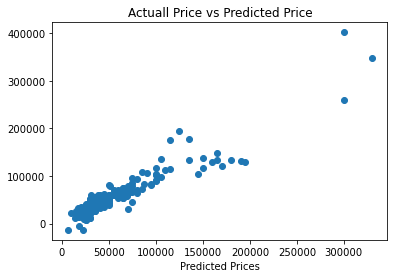

In [41]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Prices')
plt.xlabel('Predicted Prices')
plt.title('Actuall Price vs Predicted Price')
plt.shpw

In [61]:
dnew=data.sample(1)

In [62]:
dnew

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
131,Yamaha,Yamaha Fascino 110,38000,2016,0,0,37000,54500.0


In [63]:
dnew.shape

(1, 8)

In [64]:
xnew=dnew.drop(['Brand','Model','Selling_Price'],axis=1)

In [65]:
y_pred_new=lr.predict(xnew)

In [66]:
y_pred_new

array([42366.39882692])